## Atividade 01
exemplo de uso das funcoes da aula 03 com amostra de dados

In [8]:
# import needed libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# path to folder with files
path='D:/ENS410064/Dados/DataENS/ObsFlow_SWAT/diario19902012/'
# note to date interval
d_start = '1990-01-01 00:00:00'
d_end = '2012-12-31 00:00:00'
d_interv = 'D'

# list and print files on dir
files = os.listdir(path)
print('estas sao as estacoes salvas na pasta:',files)


estas sao as estacoes salvas na pasta: ['65028000.txt', '65035000.txt', '65060000.txt', '65100000.txt', '65135000.txt', '65136550.txt', '65155000.txt', '65175000.txt', '65310000.txt', '65365800.txt', '65370000.txt', '65383500.txt', '65764000.txt', '65775900.txt', '65825000.txt', '65855000.txt', '65925000.txt', '65927000.txt', '65945000.txt', '65955000.txt', '65960000.txt', '65962000.txt', '65970000.txt', '65975000.txt', '65979000.txt', '65987000.txt', '65990550.txt', '65993000.txt']


In [11]:
# import data to variable allData
allData = [pd.read_csv(path+file) for file in files] # ler txts e colocar na lista
print(type(allData)) # confere que é uma lista


<class 'list'>


In [12]:
# make a df variable with data, to allow naming columns
all = pd.concat(allData, axis=1) # concatenar em um df?

all.columns = [file[0:8] for file in files] # nomes das colunas conforme arquivos
print(type(all)) # confere que é um df


<class 'pandas.core.frame.DataFrame'>


In [13]:
# make datetime vector with data interval
#del(dtime)
dtime = pd.date_range(start=d_start, end=d_end, freq=d_interv)
dtime
type(dtime) # confere que é datetimeindex


pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
# assign vector do df column
all['datetime'] = dtime
#all # print variable

In [17]:
# transforma em datetime
all['datetime'] = pd.to_datetime(all['datetime'])
#all # print variable

In [ ]:
# transform datetime to index
all.set_index('datetime', inplace=True) # por alguma razao desconhecida só funciona se substituir a columa e nao repetir
print(all.index) #confere

In [22]:
# cria colunas mes ano dia
all.index.year
all['year'] = all.index.year
all['month'] = all.index.month
all['day'] = all.index.day
all # print variable

,65028000,65035000,65060000,65100000,65135000,65136550,65155000,65175000,65310000,65365800,...,65962000,65970000,65975000,65979000,65987000,65990550,65993000,year,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,94.94,73.00,61.16,24.48,36.14,31.20,87.22,205.10,201.07,...,130.50,6.56,588.0,22.18,541.00,NaN,664.4,1990,1,1
1990-01-02,NaN,140.75,84.35,127.85,29.32,48.24,41.30,98.04,253.25,259.92,...,153.25,7.41,526.0,17.72,563.50,NaN,608.6,1990,1,2
1990-01-03,NaN,159.50,115.00,165.00,30.00,51.18,46.24,173.75,356.70,349.82,...,186.50,6.14,696.0,17.38,593.75,NaN,627.2,1990,1,3
1990-01-04,NaN,163.30,134.00,151.00,28.12,51.42,47.52,226.54,463.60,447.08,...,154.88,5.50,838.5,16.86,658.75,NaN,683.0,1990,1,4
1990-01-05,NaN,166.35,143.60,123.25,27.75,49.68,49.12,233.30,545.70,530.17,...,153.25,6.14,937.5,21.73,999.50,NaN,720.2,1990,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,39.08,42.83,79.03,39.05,5.76,NaN,12.34,NaN,166.65,208.84,...,184.75,12.75,NaN,15.98,1166.50,21.59,973.6,2012,12,27
2012-12-28,45.92,49.02,73.83,54.62,6.89,NaN,12.06,NaN,186.50,246.13,...,190.00,10.57,NaN,19.28,1029.50,15.98,1137.0,2012,12,28
2012-12-29,62.59,61.90,67.33,85.36,10.23,NaN,11.78,NaN,198.90,262.22,...,186.50,11.39,NaN,17.90,1024.50,11.00,1197.8,2012,12,29


In [32]:
# save DataFrame to pickle file
all.to_pickle('D:/ENS410064/Dados/ExAulas/'+'df_aula.pkl')
# salvar df to csv
all.to_csv('D:/ENS410064/Dados/ExAulas/'+'dfaula.csv')

In [46]:
# abrir dataframe # read DataFrame from pickle file
Qdia = pd.read_pickle('D:/ENS410064/Dados/ExAulas/df_aula.pkl')
Qdia
Qdia.iloc[0:10,27:32]


,65993000,year,month,day
datetime,,,,
1990-01-01,664.4,1990,1,1
1990-01-02,608.6,1990,1,2
1990-01-03,627.2,1990,1,3
1990-01-04,683.0,1990,1,4
1990-01-05,720.2,1990,1,5
1990-01-06,1108.5,1990,1,6
1990-01-07,720.2,1990,1,7
1990-01-08,655.1,1990,1,8
1990-01-09,599.3,1990,1,9


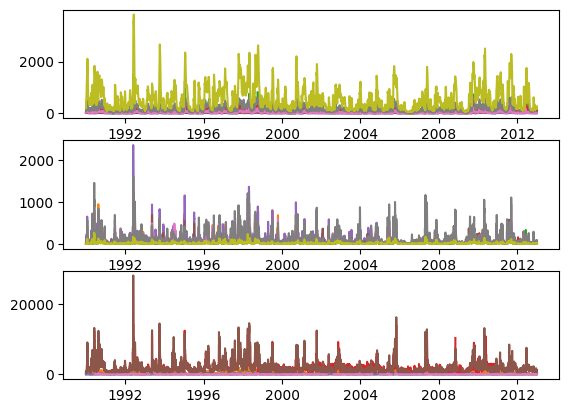

In [49]:
# plotar vazao diaria
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(Qdia.iloc[:,0:9])
ax[1].plot(Qdia.iloc[:,10:19])
ax[2].plot(Qdia.iloc[:,20:27])

In [39]:
#fazer medias
Q_monthly = Qdia.resample('M').mean() # serie de vazoes medias mensais
Q_monthly

,65028000,65035000,65060000,65100000,65135000,65136550,65155000,65175000,65310000,65365800,...,65962000,65970000,65975000,65979000,65987000,65990550,65993000,year,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-31,NaN,232.710968,383.298387,225.648710,33.198710,55.190000,108.193871,404.804194,1214.959677,1253.393226,...,457.742903,53.159677,2700.887097,72.752258,2929.979032,NaN,3114.061290,1990.0,1.0,16.0
1990-02-28,NaN,103.579286,196.966071,88.466786,15.009286,30.596071,58.677500,223.550357,811.460714,835.249643,...,201.615357,6.521071,1852.017857,30.602857,1846.778571,NaN,1946.012500,1990.0,2.0,14.5
1990-03-31,NaN,98.512258,122.885806,77.256774,11.691613,25.116129,44.353226,148.427500,393.130645,398.774194,...,77.911290,12.513548,1052.887097,13.250968,960.448387,NaN,1050.172581,1990.0,3.0,16.0
1990-04-30,NaN,74.892667,128.093000,75.735000,12.144333,23.125667,42.733333,183.439500,562.726667,574.969000,...,379.405333,45.686000,2104.533333,33.741333,2057.928333,NaN,2000.816667,1990.0,4.0,15.5
1990-05-31,NaN,72.320968,131.133548,78.168387,13.890000,27.333226,53.620645,187.514194,662.183871,686.895484,...,345.095484,16.368065,2149.193548,31.643548,2207.058065,NaN,2310.808065,1990.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-31,34.692581,41.084194,89.968065,85.098387,9.083226,NaN,30.802258,189.677097,564.343548,726.816129,...,169.229677,5.131613,NaN,43.130968,1867.469355,7.714194,1852.877419,2012.0,8.0,16.0
2012-09-30,28.753667,30.620333,47.135000,37.069667,6.014667,NaN,16.667667,68.380000,159.606667,201.638000,...,63.533333,1.122333,NaN,7.759000,1546.603333,3.315333,NaN,2012.0,9.0,15.5
2012-10-31,39.602903,43.740000,62.440968,44.013548,7.214839,NaN,20.265806,158.688571,231.110968,276.137742,...,168.859677,7.128710,NaN,12.661935,1529.683871,34.785484,1552.748387,2012.0,10.0,16.0


In [42]:
# medias mensais
Q_month.groupby(Q_monthly.month).mean() # medias mensais

,65028000,65035000,65060000,65100000,65135000,65136550,65155000,65175000,65310000,65365800,...,65962000,65970000,65975000,65979000,65987000,65990550,65993000,year,month,day
month,,,,,,,,,,,,,,,,,,,,,
1.0,90.175726,110.412426,170.506718,101.386241,17.805105,28.150906,49.144278,200.166145,579.330309,666.323675,...,192.662945,26.516339,1687.199610,35.650266,1648.873534,10.328326,1656.765498,2001.0,1.0,16.000000
2.0,92.677320,109.428768,177.703495,93.856470,18.297103,28.968267,50.557584,196.685677,635.175557,752.158200,...,214.554774,30.710703,1869.943590,36.508926,1930.027995,14.800248,1908.735821,2001.0,2.0,14.630435
3.0,69.604808,86.381276,138.830281,74.219523,13.254853,22.087250,39.855947,161.228083,502.474151,604.784979,...,153.918191,14.908275,1514.348432,26.408578,1493.241024,9.906364,1493.319425,2001.0,3.0,16.000000
4.0,52.333270,62.881739,103.790971,63.940986,10.220522,17.519317,31.992754,133.068688,414.421797,488.291841,...,227.533493,24.598725,1710.683660,35.456794,1728.090942,15.275287,1788.689058,2001.0,4.0,15.500000
5.0,50.312442,61.037391,110.110575,65.390365,9.744446,17.089432,32.114432,133.699824,473.669888,548.313043,...,275.001683,31.146686,2012.416410,46.235352,1824.277868,20.510048,1903.898948,2001.0,5.0,16.000000
6.0,53.814413,67.077580,129.229913,77.258507,11.232754,17.876143,36.418116,148.805939,566.486609,641.484348,...,320.396609,35.333014,2005.280695,50.499848,1987.756522,20.306450,2055.439928,2001.0,6.0,15.500000
7.0,62.355545,80.981360,137.242314,89.654727,12.874250,22.627250,42.871978,195.991725,609.996325,703.124081,...,276.115596,27.599565,1895.876037,33.414439,1799.339972,18.246090,1844.247265,2001.0,7.0,16.000000
8.0,53.992780,70.745736,125.412146,78.155849,11.432160,17.815576,39.611978,165.105905,536.564797,616.503717,...,234.200435,25.042695,1873.711666,34.899883,1842.004628,15.945507,1951.862412,2001.0,8.0,16.000000
9.0,66.942413,85.187261,136.759275,88.540203,13.354058,21.966095,42.074304,178.265348,586.065928,661.035826,...,251.939928,34.883000,1977.184898,38.210710,1993.185072,20.011400,2108.585152,2001.0,9.0,15.500000


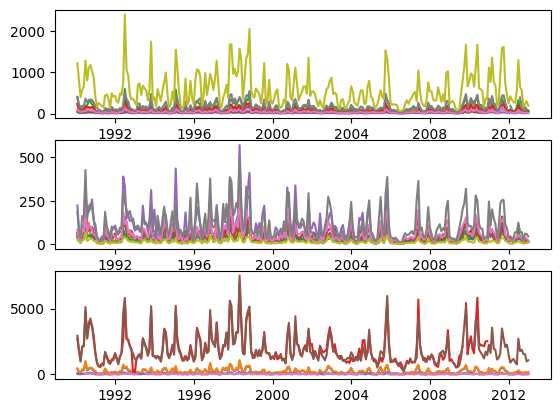

In [50]:
# plotar medias mensais
fig, ax = plt.subplots(3)
ax[0].plot(Q_month.iloc[:,0:9])
ax[1].plot(Q_month.iloc[:,10:19])
ax[2].plot(Q_month.iloc[:,20:27])

In [68]:
# maximas diarias anuais
Qdia_max = Qdia.resample('Y').max() # serie de vazoes maximas diarias anuais
# como ignorar NaN?


,65028000,65035000,65060000,65100000,65135000,65136550,65155000,65175000,65310000,65365800,...,65962000,65970000,65975000,65979000,65987000,65990550,65993000,year,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
1990-12-31,NaN,394.10,659.80,384.90,51.09,76.15,220.50,581.00,2103.0,2202.30,...,3736.00,673.50,12285.0,396.91,13173.75,332.00,15415.40,1990,12,31
1991-12-31,NaN,152.90,270.50,204.80,38.46,58.18,122.20,351.31,1104.3,1207.00,...,1415.50,216.20,3676.0,202.48,4033.00,35.98,3938.50,1991,12,31
1992-12-31,276.00,731.05,1525.00,939.00,63.05,104.80,482.25,862.80,3803.3,4100.10,...,3855.00,519.60,13985.0,380.79,28051.57,305.80,29876.70,1992,12,31
1993-12-31,328.80,492.50,926.00,425.20,45.54,69.36,169.80,607.40,2656.0,2876.80,...,1749.50,914.30,13670.0,564.45,14438.00,228.00,16975.45,1993,12,31
1994-12-31,106.51,139.60,242.60,218.25,29.25,43.85,82.96,378.70,1295.0,1430.00,...,1403.80,686.50,7130.0,450.36,10583.50,195.20,11418.50,1994,12,31
1995-12-31,674.30,800.50,1248.80,418.55,53.06,91.02,256.50,571.10,2344.0,2513.90,...,1360.10,710.90,12395.0,310.20,11546.00,107.01,14493.00,1995,12,31
1996-12-31,200.69,363.60,515.20,407.00,45.38,78.40,129.40,564.70,1493.0,1950.10,...,2141.60,940.00,8844.0,510.64,11999.00,429.00,14276.25,1996,12,31
1997-12-31,284.26,355.05,494.50,388.05,44.86,70.23,121.60,587.60,2294.2,2521.30,...,1970.00,821.50,11860.0,517.43,13320.00,299.00,15067.40,1997,12,31
1998-12-31,394.95,551.90,825.30,451.10,50.64,77.50,207.75,628.30,2621.7,2869.00,...,3085.00,773.50,13805.0,539.14,14525.75,330.40,16792.90,1998,12,31


In [99]:
# calcular Q7,10
Q7med = Qdia.rolling(7).mean() # media movel de 7 dias na serie inteira
Q7anual = Q7med.resample('Y').min() # serie de minimas anuais de médias de sete dias
# drop year day month columns
Q7med.drop(['year', 'month', 'day'], axis=1, inplace=True)
Q7anual.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [2]:
# find best distribution fit

# Import library
from distfit import distfit

dfit = distfit()        # Initialize 


In [ ]:
del(q7t) # clear temp var
q7t = Q7anual['65028000'] # make temporary variable
q7t = q7t.dropna() # drop NaNs
q7t.sort_values(ascending=True, inplace=True) # sort ascending
q7t

In [ ]:
# Determine best-fitting probability distribution for data
# loop for each station
for column in Q7anual:
    # first, order values and drop NaNs
    q7t = Q7anual(column) # reassign to temporary variable
    
   

In [126]:
 dfit.fit_transform(q7t)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 0.00388021] [loc=20.473 scale=5.750]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 0.00162809] [loc=13.070 scale=7.403]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0159243] [loc=13.070 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.08 sec] [RSS: 0.00373694] [loc=20.130 scale=4.294]
[distfit] >INFO> [t         ] [0.26 sec] [RSS: 0.003929] [loc=20.483 scale=5.757]
[distfit] >INFO> [genextreme] [0.06 sec] [RSS: 0.00074481] [loc=17.644 scale=3.870]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.000825252] [loc=12.725 scale=4.804]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000659875] [loc=10.336 scale=8.696]
[distfit] >INFO> [beta      ] [0.14 sec] [RSS: 0.00150846] [loc=13.070 scale=29.270]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.00698052] [loc=13.070 scale=23.067]
[distfit] >INFO> [loggamma  ] [0.07 sec] [RSS: 0.00398859] [loc=-1603.055 scale=224.161]


{'model': {'name': 'lognorm',
  'score': 0.0006598746951456049,
  'loc': 10.336036360065892,
  'scale': 8.696434391526935,
  'arg': (0.5617933010118471,),
  'params': (0.5617933010118471, 10.336036360065892, 8.696434391526935),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x22805219f90>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 13.78766211317217,
  'CII_max_alpha': 32.24686231159651},
 'summary':           name     score          loc       scale  \
 0      lognorm   0.00066    10.336036    8.696434   
 1   genextreme  0.000745    17.643627    3.869606   
 2        gamma  0.000825    12.724938    4.804394   
 3         beta  0.001508        13.07   29.270393   
 4        expon  0.001628        13.07    7.403061   
 5     dweibull  0.003737        20.13    4.294399   
 6         norm   0.00388    20.473061    5.749613   
 7            t  0.003929    20.483348    5.756968   
 8     loggamma  0.003989 -1603.054534  

In [143]:
# Distribution parameters for best fit
dfit.model

{'name': 'lognorm',
 'score': 0.0006598746951456049,
 'loc': 10.336036360065892,
 'scale': 8.696434391526935,
 'arg': (0.5617933010118471,),
 'params': (0.5617933010118471, 10.336036360065892, 8.696434391526935),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x22805219f90>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 13.78766211317217,
 'CII_max_alpha': 32.24686231159651}

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.561793, loc=10.336, scale=8.69643)'}, xlabel='Values', ylabel='Frequency'>)

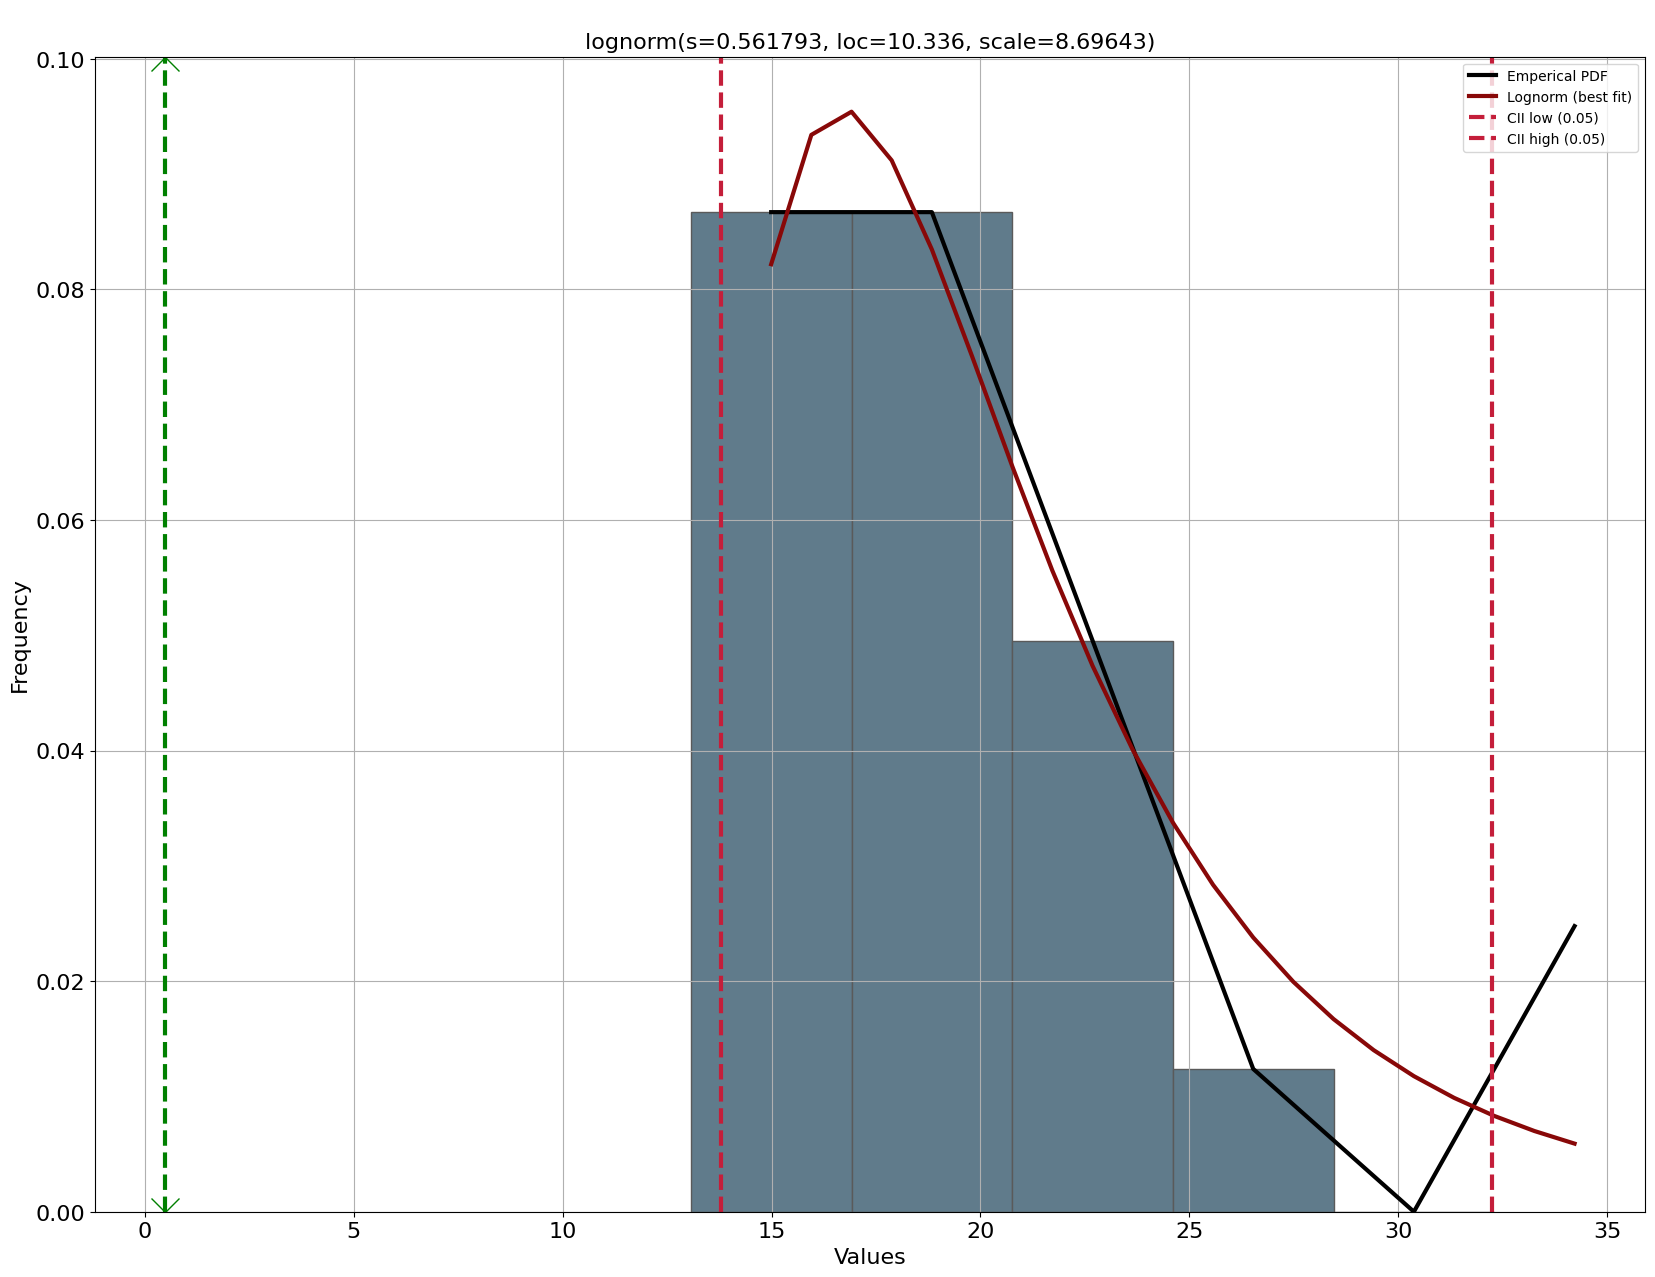

In [142]:
dfit.plot()

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Lognorm (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

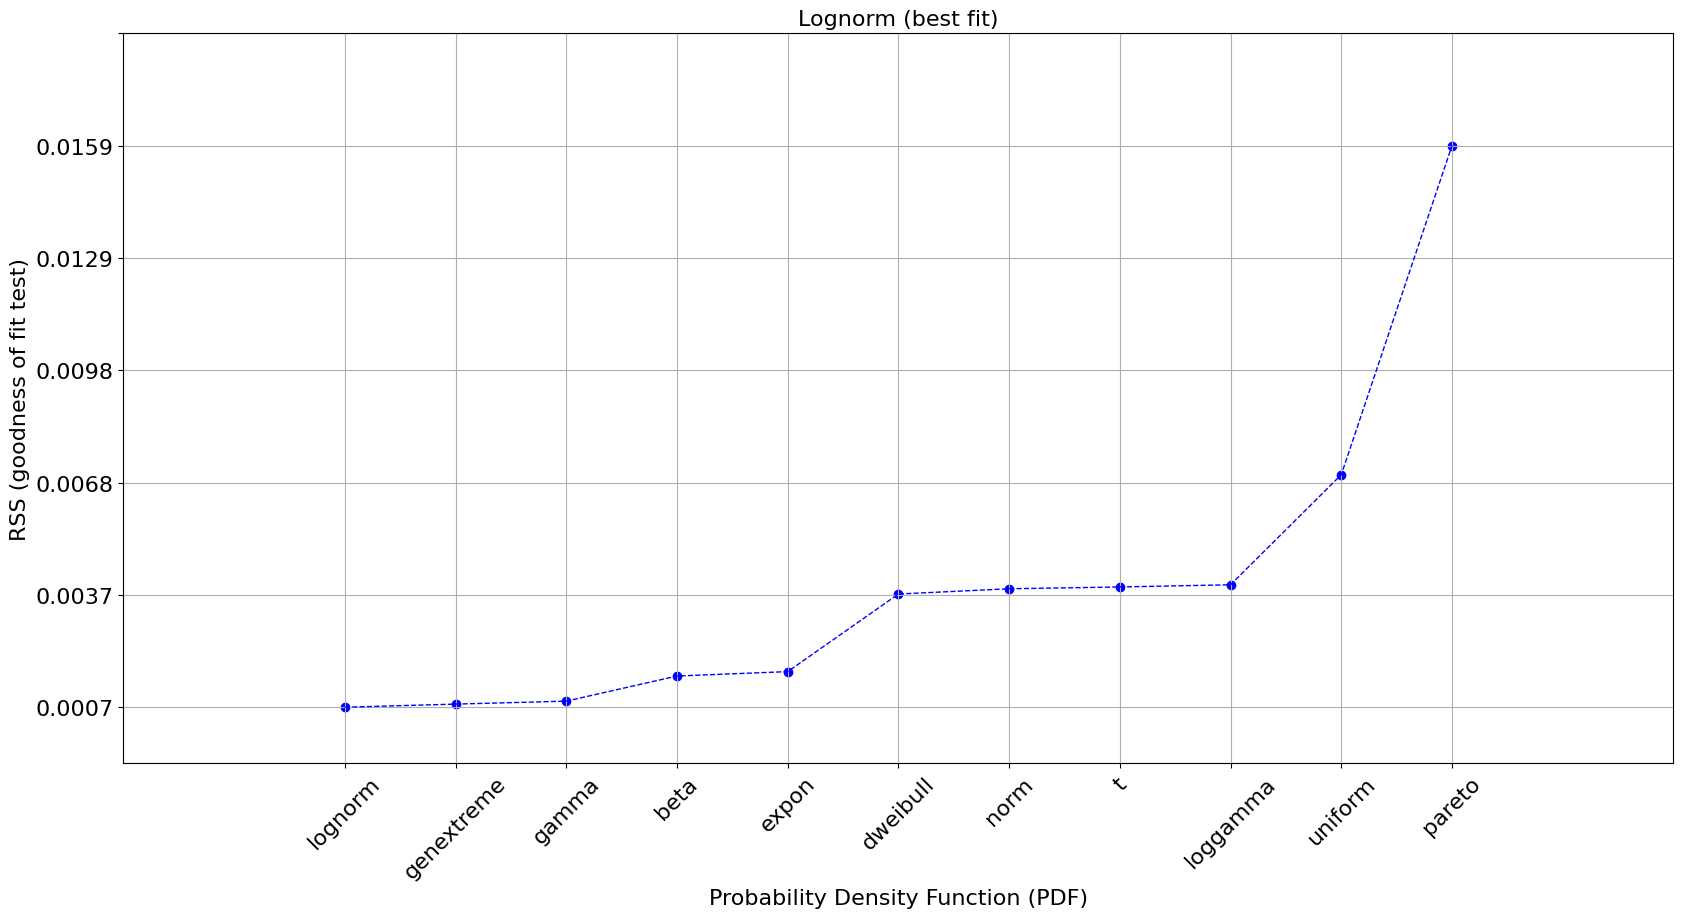

In [127]:
dfit.plot_summary()

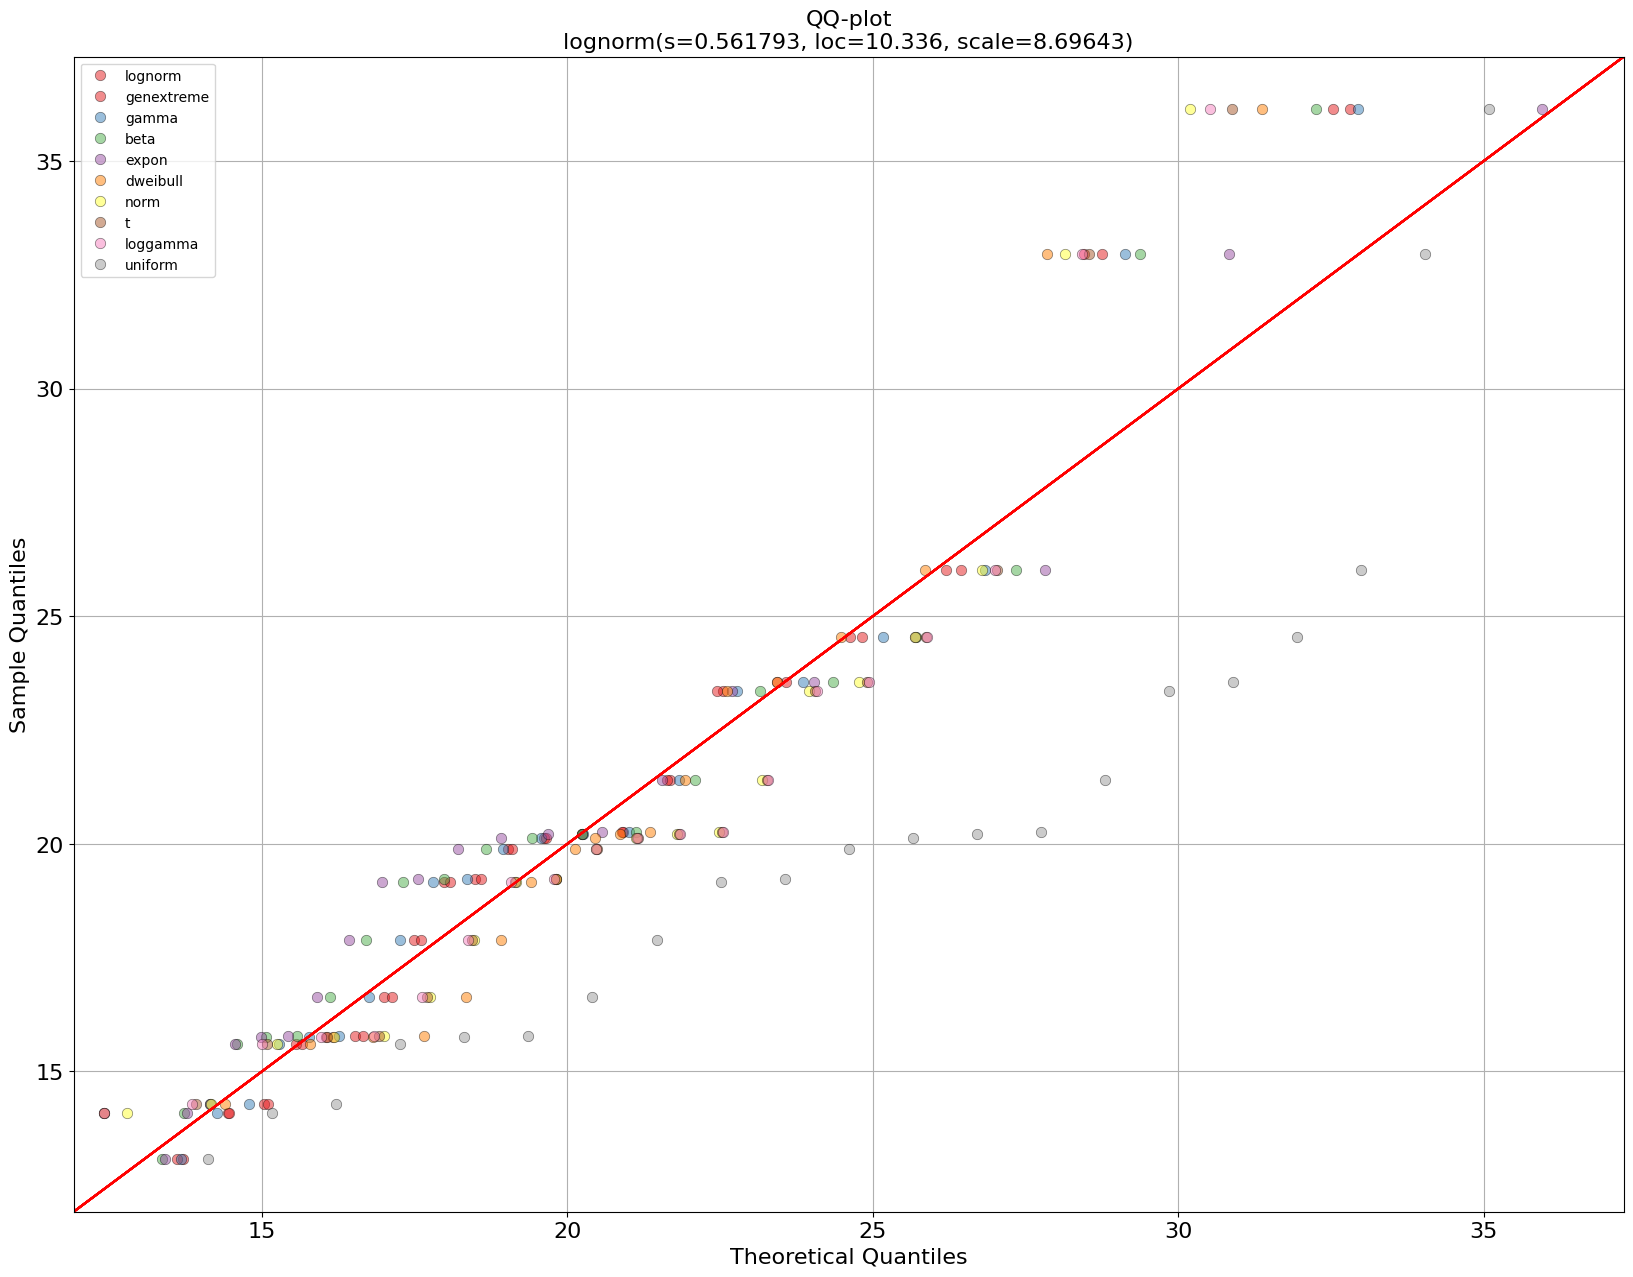

In [134]:
# QQ-plot for top 10 fitted distributions

fig, ax = dfit.qqplot(q7t, n_top=10)

In [ ]:
# Plot PDF

fig, ax = dfit.plot(chart='pdf')


# Add the CDF to the plot

fig, ax = dfit.plot(chart='cdf', n_top=1, ax=ax)